In [1]:
import pandas as pd
import numpy as np
import datetime
import tqdm
import os
from tqdm import tqdm
from utils.universe_selection import *
import matplotlib.pyplot as plt

In [2]:
### function to get SP500 tickers at certain date
get_index_components_at(when = '2020-01-04')

,Presence
Ticker,
MMM,True
ABT,True
ABBV,True
ABMD,True
ACN,True
...,...
YUM,True
ZBRA,True
ZBH,True


In [ ]:
### get SP500 components between two dates
historical_components = get_index_components_history(start_date='2021-01-01',end_date='2021-01-10')
historical_components

100%|██████████| 6/6 [00:12<00:00,  2.12s/it]


{'2021-01-01 00:00:00':         Presence
 Ticker          
 MMM         True
 ABT         True
 ABBV        True
 ABMD        True
 ACN         True
 ...          ...
 YUM         True
 ZBRA        True
 ZBH         True
 ZION        True
 ZTS         True
 
 [505 rows x 1 columns],
 '2021-01-04 00:00:00':         Presence
 Ticker          
 MMM         True
 ABT         True
 ABBV        True
 ABMD        True
 ACN         True
 ...          ...
 YUM         True
 ZBRA        True
 ZBH         True
 ZION        True
 ZTS         True
 
 [505 rows x 1 columns],
 '2021-01-05 00:00:00':         Presence
 Ticker          
 MMM         True
 ABT         True
 ABBV        True
 ABMD        True
 ACN         True
 ...          ...
 YUM         True
 ZBRA        True
 ZBH         True
 ZION        True
 ZTS         True
 
 [505 rows x 1 columns],
 '2021-01-06 00:00:00':         Presence
 Ticker          
 MMM         True
 ABT         True
 ABBV        True
 ABMD        True
 ACN         True

In [ ]:
### aggregate to form presence_matrix
P = pd.concat(historical_components)
P = P['Presence'].unstack()
P.index = pd.to_datetime(P.index).date
P.sample(5)


Ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2021-01-01,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2021-01-07,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2021-01-08,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2021-01-06,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2021-01-05,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [5]:
### save presence matrix
from utils.func import write_to_parquet
# write_to_parquet(P,'US','test_Presence')

In [30]:
P.index.names = ['Date']
P.index

DatetimeIndex(['2008-01-01', '2008-01-02', '2008-01-03', '2008-01-04',
               '2008-01-07', '2008-01-08', '2008-01-09', '2008-01-10',
               '2008-01-11', '2008-01-14',
               ...
               '2023-03-24', '2023-03-27', '2023-03-28', '2023-03-29',
               '2023-03-30', '2023-03-31', '2023-04-03', '2023-04-04',
               '2023-04-05', '2023-04-06'],
              dtype='datetime64[ns]', name='Date', length=3983, freq=None)

<Axes: xlabel='Date'>

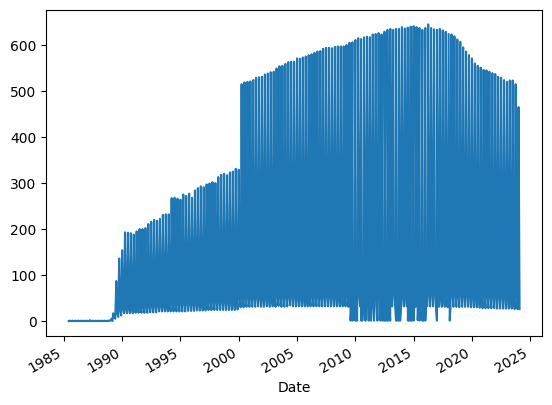

In [45]:
# P = pd.read_parquet('data/US/universe_table.pq')
test = pd.read_parquet('data/US/test_income_statement.pq')
out = test['costOfRevenue'].unstack()
out.index = pd.to_datetime(out.index)
out.count(1).plot()

In [6]:
### aggregate market_data
%load_ext autoreload 
%autoreload  2
from utils.func import aggregate_market_data
# tickers = P.columns.tolist()
# mkt_data = aggregate_market_data(tickers,datetime.date(2000,1,1))
write_to_parquet(mkt_data,'US','test_mkt_data')
# mkt_data.xs('MSFT',level=1)['close'].plot(title='MSFT close')
mkt_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
data to parquet done --> data/US/test_mkt_data.pq


,,datetime,open,high,low,close,adj_close,volume,MktCap
Date,Ticker,,,,,,,,
2000-01-03,A,2000-01-03,78.7500,78.9375,67.3749,71.9999,43.6821,4674353,NaN
2000-01-04,A,2000-01-04,68.1250,68.8750,64.7500,66.5001,40.3454,4765083,NaN
2000-01-05,A,2000-01-05,66.2500,66.5001,60.3125,62.3750,37.8427,5758642,NaN
2000-01-06,A,2000-01-06,61.6250,62.0000,58.1251,60.0001,36.4019,2534434,NaN
2000-01-07,A,2000-01-07,59.0626,65.9375,58.9999,65.0000,39.4353,2819626,NaN
...,...,...,...,...,...,...,...,...,...
2024-02-26,ZTS,2024-02-26,196.9000,197.9900,195.4600,197.0400,197.0400,2098500,NaN
2024-02-27,ZTS,2024-02-27,197.6500,199.2500,194.0400,199.0000,199.0000,1982500,NaN
2024-02-28,ZTS,2024-02-28,199.3000,200.5000,197.1000,199.9400,199.9400,2003300,NaN


In [ ]:
### aggregate balance_sheet
from utils.func import aggregate_tickers_balance_sheet
balance_sheet = aggregate_tickers_balance_sheet(tickers)
write_to_parquet(balance_sheet,'US','test_balance_sheet')
balance_sheet

100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

data to parquet done --> data/US/test_balance_sheet.pq


,,date,filing_date,currency_symbol,totalAssets,intangibleAssets,earningAssets,otherCurrentAssets,totalLiab,totalStockholderEquity,deferredLongTermLiab,otherCurrentLiab,commonStock,capitalStock,retainedEarnings,otherLiab,goodWill,otherAssets,cash,cashAndEquivalents,totalCurrentLiabilities,currentDeferredRevenue,netDebt,shortTermDebt,shortLongTermDebt,shortLongTermDebtTotal,otherStockholderEquity,propertyPlantEquipment,totalCurrentAssets,longTermInvestments,netTangibleAssets,shortTermInvestments,netReceivables,longTermDebt,inventory,accountsPayable,totalPermanentEquity,noncontrollingInterestInConsolidatedEntity,temporaryEquityRedeemableNoncontrollingInterests,accumulatedOtherComprehensiveIncome,additionalPaidInCapital,commonStockTotalEquity,preferredStockTotalEquity,retainedEarningsTotalEquity,treasuryStock,accumulatedAmortization,nonCurrrentAssetsOther,deferredLongTermAssetCharges,nonCurrentAssetsTotal,capitalLeaseObligations,longTermDebtTotal,nonCurrentLiabilitiesOther,nonCurrentLiabilitiesTotal,negativeGoodwill,warrants,preferredStockRedeemable,capitalSurpluse,liabilitiesAndStockholdersEquity,cashAndShortTermInvestments,propertyPlantAndEquipmentGross,propertyPlantAndEquipmentNet,accumulatedDepreciation,netWorkingCapital,netInvestedCapital,commonStockSharesOutstanding
Date,Ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1985-09-30,AAPL,1985-09-30,1985-09-30,USD,936200000.00,None,None,97900000.00,385700000.00,550500000.00,None,295400000.00,None,None,320300000.00,None,None,None,337000000.00,337000000.00,295400000.00,None,-337000000.00,None,None,None,315400000.00,None,822100000.00,None,None,None,220200000.00,None,167000000.00,None,None,None,None,-85200000.00,None,None,None,None,None,None,23700000.00,None,114100000.00,None,None,None,90300000.00,None,None,None,None,936200000.00,337000000.00,90400000.00,90400000.00,None,None,None,13837824000.00
1985-12-31,AAPL,1985-12-31,1985-12-31,USD,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,13837824000.00
1986-03-31,AAPL,1986-03-31,1986-03-31,USD,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,14033600000.00
1986-06-30,AAPL,1986-06-30,1986-06-30,USD,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,14260064000.00
1986-09-30,AAPL,1986-09-30,1986-09-30,USD,1160100000.00,None,None,92900000.00,466000000.00,694100000.00,None,328500000.00,None,None,474300000.00,None,None,None,576200000.00,576200000.00,328500000.00,None,-576200000.00,None,None,None,334500000.00,None,1040900000.00,None,None,None,263100000.00,None,108700000.00,None,None,None,None,-114700000.00,None,None,None,None,None,None,11900000.00,None,119200000.00,None,None,None,137500000.00,None,None,None,None,1160100000.00,576200000.00,107300000.00,107300000.00,None,None,None,14260064000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,MSFT,2022-03-31,2022-04-26,USD,344607000000.00,11348000000.00,None,13320000000.00,181683000000.00,162924000000.00,304000000.00,25578000000.00,85767000000.00,85767000000.00,79633000000.00,31159000000.00,67371000000.00,2184500

In [ ]:
### aggregate tickers GICS
from utils.func import aggregate_tickers_classifs
GICS = aggregate_tickers_classifs(tickers)
write_to_parquet(GICS,'US','test_GICS')
GICS


  0%|          | 0/2 [00:00<?, ?it/s][DEBUG]-Starting new HTTPS connection (1): eodhistoricaldata.com:443
[DEBUG]-https://eodhistoricaldata.com:443 "GET /api/fundamentals/AAPL.US?api_token=640aa99a271902.64352462&filter=General HTTP/1.1" 200 None
 50%|█████     | 1/2 [00:00<00:00,  2.16it/s][DEBUG]-Starting new HTTPS connection (1): eodhistoricaldata.com:443
[DEBUG]-https://eodhistoricaldata.com:443 "GET /api/fundamentals/MSFT.US?api_token=640aa99a271902.64352462&filter=General HTTP/1.1" 200 None
100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

data to parquet done --> data/US/test_GICS.pq


,sector,industry,gicsect,gicgrp,gicind,gicsubind
AAPL,Technology,Consumer Electronics,Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals"
MSFT,Technology,Software-Infrastructure,Information Technology,Software & Services,Software,Systems Software


In [ ]:
### aggregate tickers income_statement
from utils.func import aggregate_tickers_earnings
earnings = aggregate_tickers_earnings(tickers)
write_to_parquet(earnings,'US','test_earnings')
earnings  ## cautions that Date index is actually leaked, we will use earnings in the future to use fundamental data

100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

data to parquet done --> data/US/test_earnings.pq


,,reportDate,date,beforeAfterMarket,currency,epsActual,epsEstimate,epsDifference,surprisePercent
Date,Ticker,,,,,,,,
1993-12-31,AAPL,1993-12-31,1993-12-31,None,USD,0.0031,None,None,None
1994-03-31,AAPL,1994-03-31,1994-03-31,None,USD,0.0104,None,None,None
1994-06-30,AAPL,1994-06-30,1994-06-30,None,USD,0.0104,None,None,None
1994-09-30,AAPL,1994-10-17,1994-09-30,None,USD,0.03,0.03,0,0
1994-12-31,AAPL,1995-01-19,1994-12-31,None,USD,0.05,0.04,0.01,25
...,...,...,...,...,...,...,...,...,...
2023-03-31,MSFT,2023-04-25,2023-03-31,AfterMarket,USD,2.45,2.23,0.22,9.8655
2023-06-30,MSFT,2023-07-24,2023-06-30,BeforeMarket,USD,None,2.56,None,None
2023-09-30,MSFT,2023-10-23,2023-09-30,BeforeMarket,USD,None,None,None,None


In [ ]:
### aggregate tickers income_statement
from utils.func import aggregate_tickers_cash_flow
cash = aggregate_tickers_cash_flow(tickers)
write_to_parquet(cash,'US','test_cash')